<a href="https://colab.research.google.com/github/jahnavineelam/ML-Linear-Rigression/blob/main/Predicting_Taxi_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


data = pd.read_csv('/content/Taxi_Trips_-_2024_20240408.csv')

print("Shape:", data.shape)

Saving Taxi_Trips_-_2024_20240408.csv to Taxi_Trips_-_2024_20240408.csv
Shape: (865247, 23)


In [3]:
print("Shape:", data.shape)
print("Columns:", data.columns)

Shape: (865247, 23)
Columns: Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')


In [4]:
df = data[['Trip Miles', 'Trip Seconds', 'Pickup Community Area', 'Dropoff Community Area', 'Fare']].copy()

In [8]:
# Drop missing values
df.dropna(inplace=True)

# Remove invalid data (zero or negative values)
df = df[(df['Trip Miles'] > 0) & (df['Trip Seconds'] > 0) & (df['Fare'] > 0)]

# Convert community area to integer
df['Pickup Community Area'] = df['Pickup Community Area'].astype(int)
df['Dropoff Community Area'] = df['Dropoff Community Area'].astype(int)

In [9]:
X = df[['Trip Miles', 'Trip Seconds', 'Pickup Community Area', 'Dropoff Community Area']]
y = df['Fare']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("R² Score:", round(r2, 2))

Mean Absolute Error: 2.96
R² Score: 0.52


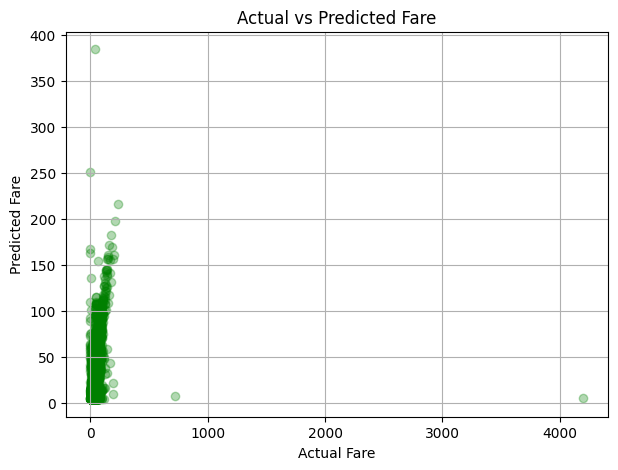

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.show()